In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import keras
import cv2
import mtcnn

In [2]:
model = keras.models.load_model('../Models/FER.h5')

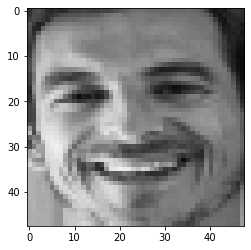

In [3]:
img = plt.imread('../Images/FER/face11.jfif')
detector = mtcnn.MTCNN()
faces = detector.detect_faces(img)
if len(faces) > 0:
    x, y, w, h = faces[0]['box']
    img = img[y:y+h, x:x+w]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img/255
img = cv2.resize(img, (48, 48), interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap='gray', vmin=0, vmax=1)

In [4]:
label_dict = {0:'Angry',1:'Happy',2:'Sad'}
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

[2.5203852e-05, 0.99989283, 8.204274e-05]
Happy
